<a href="https://colab.research.google.com/github/xhxuciedu/CS175/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [2]:
# Get the dataset
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Visualize the data

In [19]:
# get a mini-batch of training samples
x, y = list(iter(train_loader))[0]

In [21]:
# check the size of mini-batch
x.shape, y.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

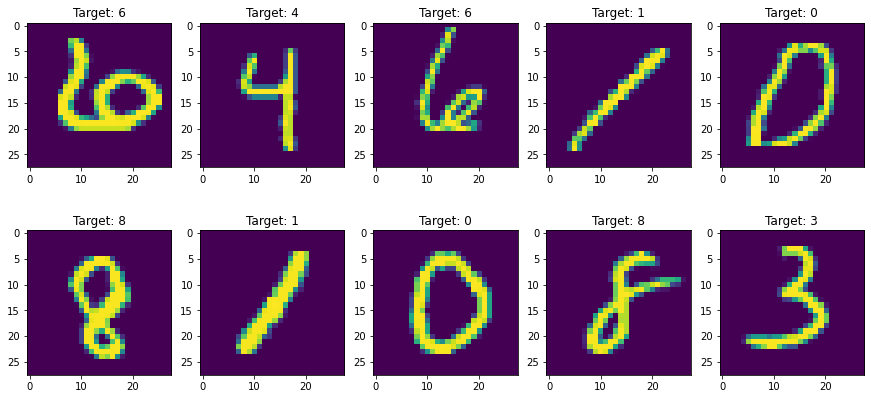

In [32]:
# plot a few samples
fig, ax = plt.subplots(2,5, figsize=(15,7))
for i in range(2):
  for j in range(5):
    ax[i,j].imshow(x[i*5+j,0,:,:])
    ax[i,j].set_title('Target: {}'.format(y[i*5+j]))

## Build a logistic regression model

In [3]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [4]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))



Epoch [1/5], Step [100/600], Loss: 2.1804
Epoch [1/5], Step [200/600], Loss: 2.1093
Epoch [1/5], Step [300/600], Loss: 2.0110
Epoch [1/5], Step [400/600], Loss: 1.9199
Epoch [1/5], Step [500/600], Loss: 1.8556
Epoch [1/5], Step [600/600], Loss: 1.7822
Epoch [2/5], Step [100/600], Loss: 1.7144
Epoch [2/5], Step [200/600], Loss: 1.6607
Epoch [2/5], Step [300/600], Loss: 1.5468
Epoch [2/5], Step [400/600], Loss: 1.5248
Epoch [2/5], Step [500/600], Loss: 1.4969
Epoch [2/5], Step [600/600], Loss: 1.4479
Epoch [3/5], Step [100/600], Loss: 1.3957
Epoch [3/5], Step [200/600], Loss: 1.4366
Epoch [3/5], Step [300/600], Loss: 1.2869
Epoch [3/5], Step [400/600], Loss: 1.4024
Epoch [3/5], Step [500/600], Loss: 1.3758
Epoch [3/5], Step [600/600], Loss: 1.1937
Epoch [4/5], Step [100/600], Loss: 1.1892
Epoch [4/5], Step [200/600], Loss: 1.2161
Epoch [4/5], Step [300/600], Loss: 1.1718
Epoch [4/5], Step [400/600], Loss: 1.0926
Epoch [4/5], Step [500/600], Loss: 1.1408
Epoch [4/5], Step [600/600], Los

In [5]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 82.91000366210938 %
